###The dataset is available [Here](https://www.kaggle.com/datasets/shivam20kushwaha/imdb-movies?select=IMDB+Dataset.csv)

## Problem Identification
You are required to build a sentiment classification model that can identify the sentiment of reviews from a given text. The dataset contains reviews labeled as either positive or negative.

You will be evaluated based on the following criteria:
- Data Preprocessing
- Feature Representation
- Model Building
- Model Evaluation
- Results Demonstration

## Steps

### 1. Data Preprocessing

- Load necessary libraries and dataset.
- Perform basic data exploration.
- Handle missing values if any.
- Tokenize, normalize, and remove stopwords from the text data if needed.
- Apply text preprocessing function to clean the text data.
- Split the dataset into training and testing sets.

In [7]:
# استيراد المكتبات الضرورية
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# تحميل مجموعة البيانات
df = pd.read_csv('/content/IMDB_Dataset.csv')
df = pd.read_csv('/content/Cleaned.csv')

# استكشاف البيانات الأساسية
print(df.head())
print(df.info())

# التعامل مع القيم المفقودة (إن وجدت)
print(df.isnull().sum())
# نفترض أنه لا توجد قيم مفقودة

# تحميل حزم NLTK الضرورية
nltk.download('stopwords')
nltk.download('punkt')

# إعداد التوكن والـ stemmer
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    # تحويل النص إلى حروف صغيرة
    text = text.lower()

    # إزالة الأحرف الخاصة والأرقام
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # تقطيع النص إلى توكنز
    tokens = nltk.word_tokenize(text)

    # إزالة كلمات التوقف وعمل stemming للتوكنز
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]

    # إعادة التوكنز إلى نص واحد
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

# تطبيق دالة المعالجة المسبقة على عمود المراجعات
df['preprocessed_review'] = df['review'].apply(preprocess_text)

# تقسيم مجموعة البيانات إلى مجموعات التدريب والاختبار
X_train, X_test, y_train, y_test = train_test_split(df['preprocessed_review'], df['sentiment'], test_size=0.2, random_state=42)

# تحويل النصوص إلى مصفوفة عددية باستخدام CountVectorizer
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

print(X_train_vec.shape)
print(X_test_vec.shape)

                                              review sentiment
0  one of the other reviewers has mentioned that ...  positive
1  a wonderful little production  the filming tec...  positive
2  i thought this was a wonderful way to spend ti...  positive
3  basically there is a family where a little boy...  negative
4  petter mattei s  love in the time of money  is...  positive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None
review       0
sentiment    0
dtype: int64


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


(40000, 64694)
(10000, 64694)


### 2. Feature Representation

You can use various methods for feature representation, such as TF-IDF or Bag of Words. Here is how to implement TF-IDF feature representation:

- Import `TfidfVectorizer` from `sklearn`.
- Initialize `TfidfVectorizer` with desired parameters.
- Fit and transform the training data to obtain TF-IDF features.
- Transform the testing data using the same vectorizer.

In [8]:
#Feature Representation
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test)



### 3. Model Building

- Import necessary libraries for model building (e.g., Naive Bayes, SVM, Random Forest).
- Initialize the model.
- Train the model to predict the sentiment.

In [9]:
#Model Building
# Import necessary libraries for model building
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Initialize the models
nb_model = MultinomialNB()
svm_model = SVC()
rf_model = RandomForestClassifier()

# Train the models
nb_model.fit(X_train_tfidf, y_train)
svm_model.fit(X_train_tfidf, y_train)
rf_model.fit(X_train_tfidf, y_train)


RandomForestClassifier()

### 4. Model Evaluation

- Import evaluation metrics.
- Predict the labels for the test data using the trained models.
- Evaluate the model using classification report and accuracy score.


In [10]:
#Model Evaluation
# Import evaluation metrics
from sklearn.metrics import classification_report, accuracy_score

# Predict the labels for the test data
y_pred_nb = nb_model.predict(X_test_tfidf)
y_pred_svm = svm_model.predict(X_test_tfidf)
y_pred_rf = rf_model.predict(X_test_tfidf)

# Evaluate the models
print("Naive Bayes:")
print(classification_report(y_test, y_pred_nb))
print("Accuracy:", accuracy_score(y_test, y_pred_nb))

print("SVM:")
print(classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))

print("Random Forest:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))


Naive Bayes:
              precision    recall  f1-score   support

    negative       0.85      0.87      0.86      4961
    positive       0.87      0.85      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

Accuracy: 0.8602
SVM:
              precision    recall  f1-score   support

    negative       0.91      0.88      0.90      4961
    positive       0.89      0.91      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

Accuracy: 0.898
Random Forest:
              precision    recall  f1-score   support

    negative       0.85      0.86      0.85      4961
    positive       0.86      0.85      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted

### 5. Results Demonstration

- Visualize the results using appropriate plots (e.g., confusion matrix).
-Providing example predictions on new/unseen data


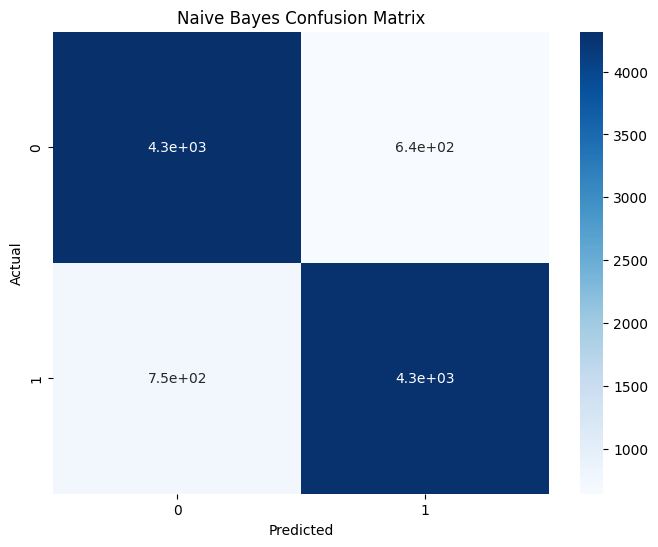

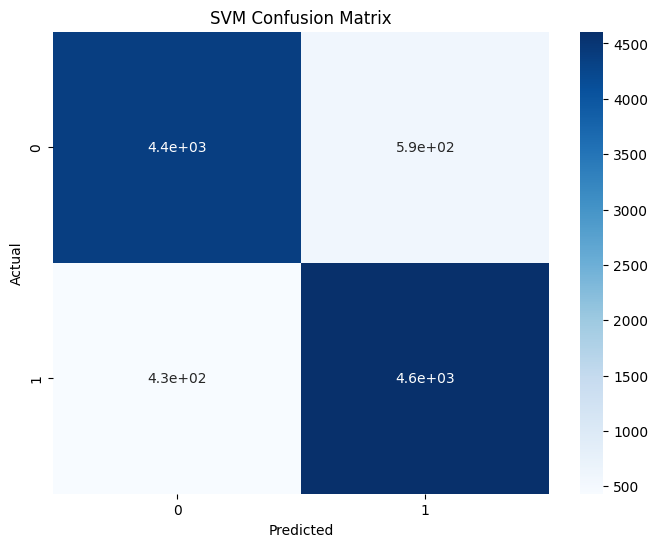

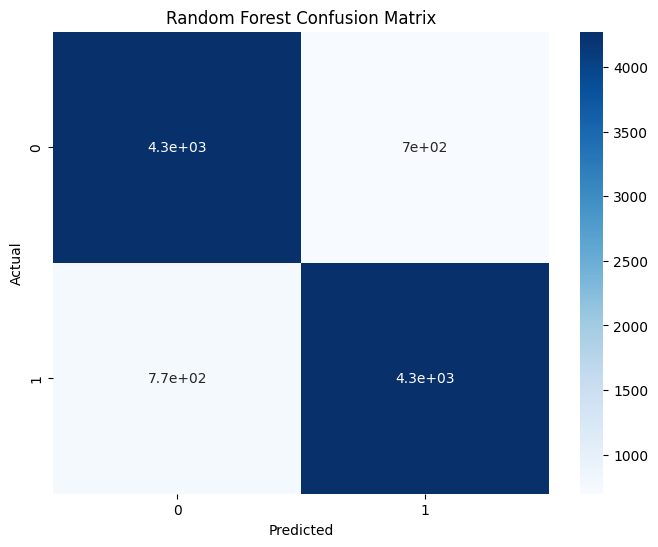

Example Predictions:
Positive Review: Negative
Negative Review: Negative


In [11]:
#Results Demonstration
# Visualize the results using a confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_confusion_matrix(y_test, y_pred_nb, 'Naive Bayes')
plot_confusion_matrix(y_test, y_pred_svm, 'SVM')
plot_confusion_matrix(y_test, y_pred_rf, 'Random Forest')

# Example predictions on new/unseen data
example_reviews = [
    "This movie was amazing! I loved the plot and the acting was superb.",
    "The movie was a complete disappointment. The story was boring and the characters were uninteresting."
]

example_reviews_preprocessed = [preprocess_text(review) for review in example_reviews]
example_reviews_tfidf = tfidf_vectorizer.transform(example_reviews_preprocessed)

print("Example Predictions:")
print("Positive Review:", "Positive" if nb_model.predict(example_reviews_tfidf)[0] == 1 else "Negative")
print("Negative Review:", "Positive" if nb_model.predict(example_reviews_tfidf)[1] == 1 else "Negative")
